In [1]:
import pandas as pd
import numpy as np
import os
from pandas.tseries.offsets import DateOffset

In [2]:
files = os.listdir('data/currencies')

In [3]:
cur = 'USD'

In [4]:
df = pd.read_csv('data/currencies/' + f'{cur}.csv', sep=';', index_col=0)
df.fillna(method='ffill', inplace=True)

In [ ]:
df.to_csv('data/currencies/' + f'{cur}.csv', sep=';')

In [ ]:
dfs[14]

In [ ]:
dfs[1].index

In [ ]:
df = pd.read_csv('data/underlying-available.csv', sep=';')
func = lambda x: ''.join([x['label'], ' (', x['exchange'], ')'])
df['label'] = df.apply(func, axis=1)

In [ ]:
AVAILABLE_UNDERLYINGS = df[['label', 'value']].to_dict('records')

In [ ]:
date = '2023-05-01'
underlyings = ['ISXEOD5', 'MMM']
currency = 'USD'
term = 120

und = underlyings[0]


In [ ]:
und_df = pd.read_csv(f'data/underlying/{und}.csv', sep=';', parse_dates=['date'], dayfirst=True, index_col=0)
und_df

In [ ]:
filt_unds = []
spot_prices = []

for und in underlyings:
    und_df = pd.read_csv(f'data/underlying/{und}.csv', sep=';',
                         parse_dates=['date'], dayfirst=True)

    und_df = und_df.loc[(und_df['date'] <= date) & (und_df['date'] >= pd.to_datetime(date) - DateOffset(months=term // 2))].set_index('date')

    filt_und = und_df[:date]
    spot_prices.append(float(und_df.iloc[-1]))
    filt_unds.append(filt_und)

spot_prices = np.array(spot_prices)
df = pd.concat(filt_unds, axis=1)

daily_returns = df.pct_change().dropna(axis=0)
monthly_returns = df.resample('M').first().pct_change().dropna(axis=0)


In [ ]:
mu = (df.iloc[-1] / df.iloc[0])**(24/term) - 1
print(mu.to_numpy())

In [ ]:
volatilities = monthly_returns.std(axis=0) * 12**0.5
volatilities

In [ ]:
daily_returns_corr = daily_returns.corr()
daily_returns_corr

In [ ]:
monthly_returns.corr()

In [ ]:
df = pd.read_csv(f'data/currencies/{currency}.csv', sep=';',
                 parse_dates=['date'], dayfirst=True, index_col=0)
row = df[:date].iloc[-1].dropna() / 100

In [ ]:
tenors = np.array([int(x) for x in row.index]) / 12
tenors

In [ ]:
values = row.to_numpy()
values

In [ ]:
from finance_data import get_asset_data, get_risk_free_rate_data, get_price_paths_e

In [ ]:
get_asset_data(['XOM', 'MMM', 'AAPL'], '2023-05-01', 120)

In [ ]:
get_risk_free_rate_data('USD', '2023-05-01')

In [ ]:
from utilities import parse_num_array

In [ ]:
type(parse_num_array('100,'))

In [ ]:
get_price_paths_e(0, 0, 0, 0, 0, 0, 0).shape

In [ ]:
lst = [1, 2, 3, 4, 5]

func = lambda x1, x2, x3, x4: x1+x2+x3+x4

func(*lst[:-1])


In [ ]:
inc = 23.75
start = 1190
end = 1926.25

while start <= end:
    print(start, sep=', ')
    start += inc

In [ ]:
def get_available_underlyings(str_path):
    df = pd.read_csv(str_path, sep=sep)
    func = lambda x: ''.join([x['label'], ' (', x['exchange'], ')'])
    df['label'] = df.apply(func, axis=1)

    return df[['label', 'value']].sort_values('label').to_dict('records')


AVAILABLE_UNDERLYINGS = get_available_underlyings('data/underlying-available.csv')

In [15]:
df = pd.read_csv('data/underlyings-available.csv', sep=';')
df.rename(columns={'long_name': 'label'}, inplace=True)

In [16]:
SYMBOL_DIV_YIELDS = df.set_index('value')['div_yield'].to_dict()
SYMBOL_DIV_YIELDS

{'ORA.PA': 0.07,
 'TTE.PA': 0.0511,
 'ASML.AS': 0.0162,
 'NVDA': 0.00059999997,
 'JNJ': 0.0292,
 'MRK.DE': 0.013300001,
 'PFE': 0.042,
 'SAN.PA': 0.0356,
 'GEBN.SW': 0.024500001,
 'GIVN.SW': 0.0211,
 'SIKA.SW': 0.013200001,
 'SREN.SW': 0.0648,
 'ZURN.SW': 0.0559,
 'CFR.SW': 0.0152,
 'NESN.SW': 0.025799999,
 'NOVN.SW': 0.0344,
 'ROG.SW': 0.0339,
 'SIE.DE': 0.028800001,
 'INGA.AS': 0.048600003,
 'CS.PA': 0.0581,
 'HELN.SW': 0.0465,
 'SLHN.SW': 0.0547,
 'OR.PA': 0.0139,
 'MC.PA': 0.0137,
 'MSFT': 0.0089,
 'CVX': 0.0377,
 'LONN.SW': 0.006,
 'PGHN.SW': 0.043,
 'UBSG.SW': 0.0275,
 'EMSN.SW': 0.0199,
 'SGSN.SW': 0.0397,
 'LOGN.SW': 0.0183,
 'SCMN.SW': 0.0363,
 'AAL.L': 0.0683,
 'META': 0.0,
 'BNP.PA': 0.067600004,
 'STMPA.PA': 0.0057,
 'FRE.DE': 0.036,
 'ZAL.DE': 0.0,
 'GLE.PA': 0.0762,
 'MBG.DE': 0.078,
 'RMS.PA': 0.0064999997,
 'AMZN': 0.0,
 'ACA.PA': 0.0971,
 'LI.PA': 0.0793,
 'KO': 0.028900001,
 'DSY.PA': 0.0056}

In [17]:
LABELS_SYMBOLS = df[['label', 'value']].sort_values('label').to_dict('records')
LABELS_SYMBOLS

[{'label': 'ASML Holding', 'value': 'ASML.AS'},
 {'label': 'AXA', 'value': 'CS.PA'},
 {'label': 'Amazon.com', 'value': 'AMZN'},
 {'label': 'Anglo American', 'value': 'AAL.L'},
 {'label': 'BNP Paribas', 'value': 'BNP.PA'},
 {'label': 'Chevron', 'value': 'CVX'},
 {'label': 'Coca-Cola', 'value': 'KO'},
 {'label': 'Compagnie Financière Richemont', 'value': 'CFR.SW'},
 {'label': 'Crédit Agricole', 'value': 'ACA.PA'},
 {'label': 'Dassault Systèmes', 'value': 'DSY.PA'},
 {'label': 'EMS-CHEMIE HOLDING', 'value': 'EMSN.SW'},
 {'label': 'Fresenius SE & Co.', 'value': 'FRE.DE'},
 {'label': 'Geberit', 'value': 'GEBN.SW'},
 {'label': 'Givaudan', 'value': 'GIVN.SW'},
 {'label': 'Helvetia Holding', 'value': 'HELN.SW'},
 {'label': 'Hermès International', 'value': 'RMS.PA'},
 {'label': 'ING Groep', 'value': 'INGA.AS'},
 {'label': 'Johnson & Johnson', 'value': 'JNJ'},
 {'label': 'Klépierre', 'value': 'LI.PA'},
 {'label': "L'Oréal", 'value': 'OR.PA'},
 {'label': 'LVMH Moët Hennessy - Louis Vuitton', 'val

In [18]:
yield_maturities = np.array([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
yeilds = np.array([0.15,0.27,0.50,0.93,1.52,2.13,2.32,2.34,2.37,2.32,2.65,2.52]).astype(float)/100


In [20]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

curve_fit, status = calibrate_nss_ols(yield_maturities,yeilds)
curve_fit

NelsonSiegelSvenssonCurve(beta0=0.02839153220222084, beta1=-0.029279498974272837, beta2=0.025428221778323684, beta3=-0.014174074291466623, tau1=0.9922984048369404, tau2=4.781409382841036)

In [ ]:
curvefit(yield_maturities)

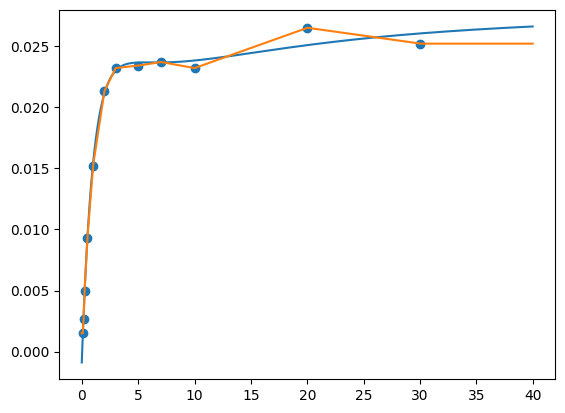

In [26]:
import matplotlib.pyplot as plt
plt.scatter(yield_maturities, yeilds)
plt.plot(np.arange(0,40,0.01), curve_fit(np.arange(0,40,0.01)))
plt.plot(np.arange(0,40,0.01), np.interp(np.arange(0,40,0.01), yield_maturities,yeilds))
plt.show()

In [27]:
principal = 1000
coupon_payment = 2.875/100 * principal

In [61]:
obs_dates = [0.25, 0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.,
             2.25, 2.5, 2.75, 3., 3.25, 3.5, 3.75, 4., 4.25, 4.5, 4.75, 5. ]

In [62]:
discount_rates = [0.0476, 0.0486, 0.048, 0.0474, 0.046025, 0.04465, 0.043275, 0.0419, 0.04105, 0.0402, 0.03935, 0.0385, 0.038175, 0.03785, 0.037525, 0.0372, 0.036875, 0.03655, 0.036225, 0.0359 ]

In [55]:
len(obs_dates), len(discount_rates)

(20, 20)

In [56]:
discount_rates = np.array(discount_rates) * obs_dates[0]

In [57]:
sum = 0
for t, r in enumerate(discount_rates):
    sum += coupon_payment/(1+r)**(t+1)

In [58]:
sum

520.1564398794643

In [63]:
principal/(1+(discount_rates[-1]-0.1))**obs_dates[-1]

838.3219444065707

In [46]:
obs_dates = np.arange(0, 5+1/12, 1/12)[1:]
obs_dates

array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        , 1.08333333, 1.16666667, 1.25      ,
       1.33333333, 1.41666667, 1.5       , 1.58333333, 1.66666667,
       1.75      , 1.83333333, 1.91666667, 2.        , 2.08333333,
       2.16666667, 2.25      , 2.33333333, 2.41666667, 2.5       ,
       2.58333333, 2.66666667, 2.75      , 2.83333333, 2.91666667,
       3.        , 3.08333333, 3.16666667, 3.25      , 3.33333333,
       3.41666667, 3.5       , 3.58333333, 3.66666667, 3.75      ,
       3.83333333, 3.91666667, 4.        , 4.08333333, 4.16666667,
       4.25      , 4.33333333, 4.41666667, 4.5       , 4.58333333,
       4.66666667, 4.75      , 4.83333333, 4.91666667, 5.        ])

In [48]:
principal/(1+(2.605/100*1/12))**len(obs_dates)

877.9998740935835